In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df=pd.read_csv("medical_students_dataset.csv")

In [236]:
len(df)

200000

In [237]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [238]:
df.columns

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')

<Axes: xlabel='BMI', ylabel='Cholesterol'>

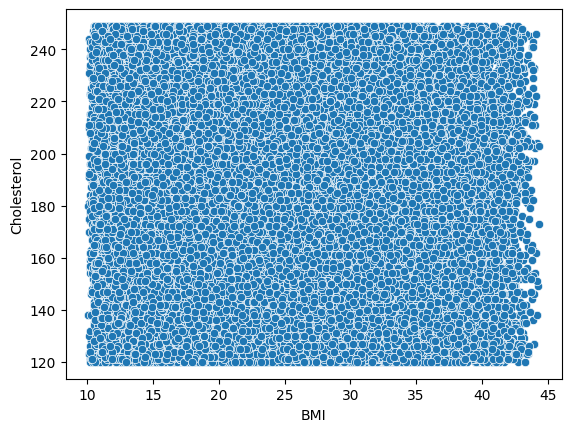

In [239]:
sns.scatterplot(df, x="BMI",y="Cholesterol")

<Axes: xlabel='BMI', ylabel='Smoking'>

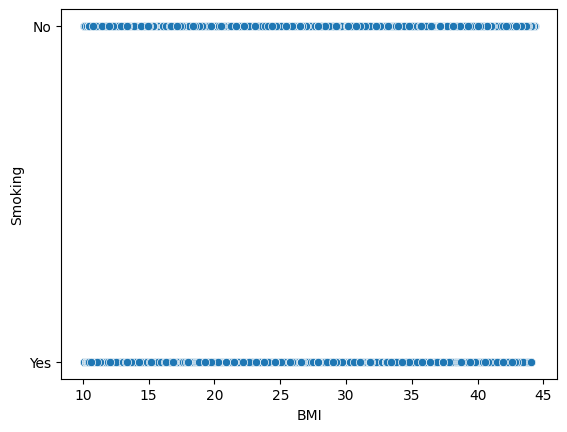

In [240]:
sns.scatterplot(df, x="BMI",y="Smoking")

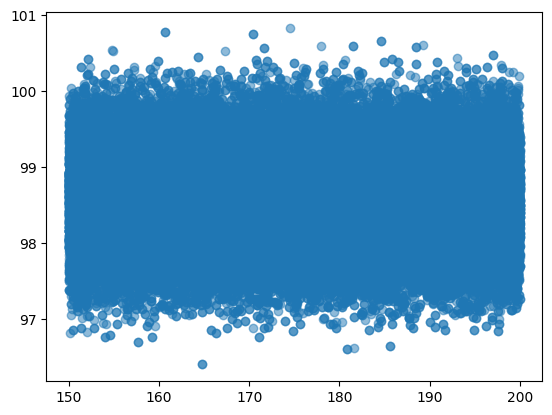

In [241]:
x=df["Height"]
y=df["Temperature"]
plt.scatter(x=x,y=y,alpha=0.5)

In [242]:
co_mtx = df.corr(numeric_only=True)

<Axes: >

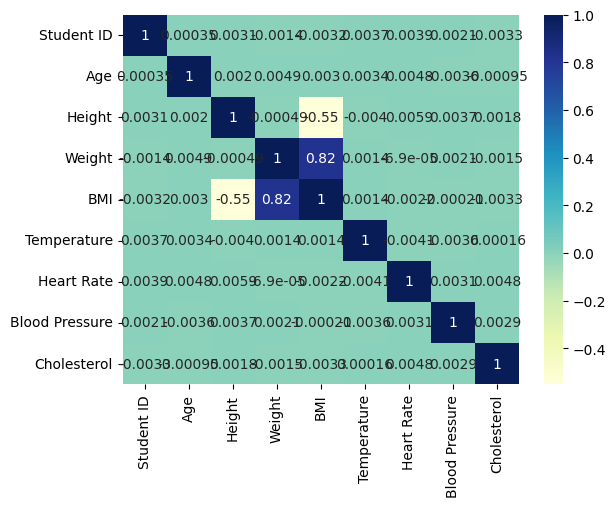

In [243]:
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

In [244]:
df=df.drop(columns="Student ID")

In [245]:
df

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


# Missing Values

In [246]:
df.isna().sum()

Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [247]:
len(df)

200000

10% od sekoja klasa se nan

In [248]:
df2=df.dropna()

In [249]:
len(df2)

56489

Imame izgubeno 75% od datasetot ako samo se dropnat redovi so null vrednosti

In [250]:
import missingno as msno

<Axes: >

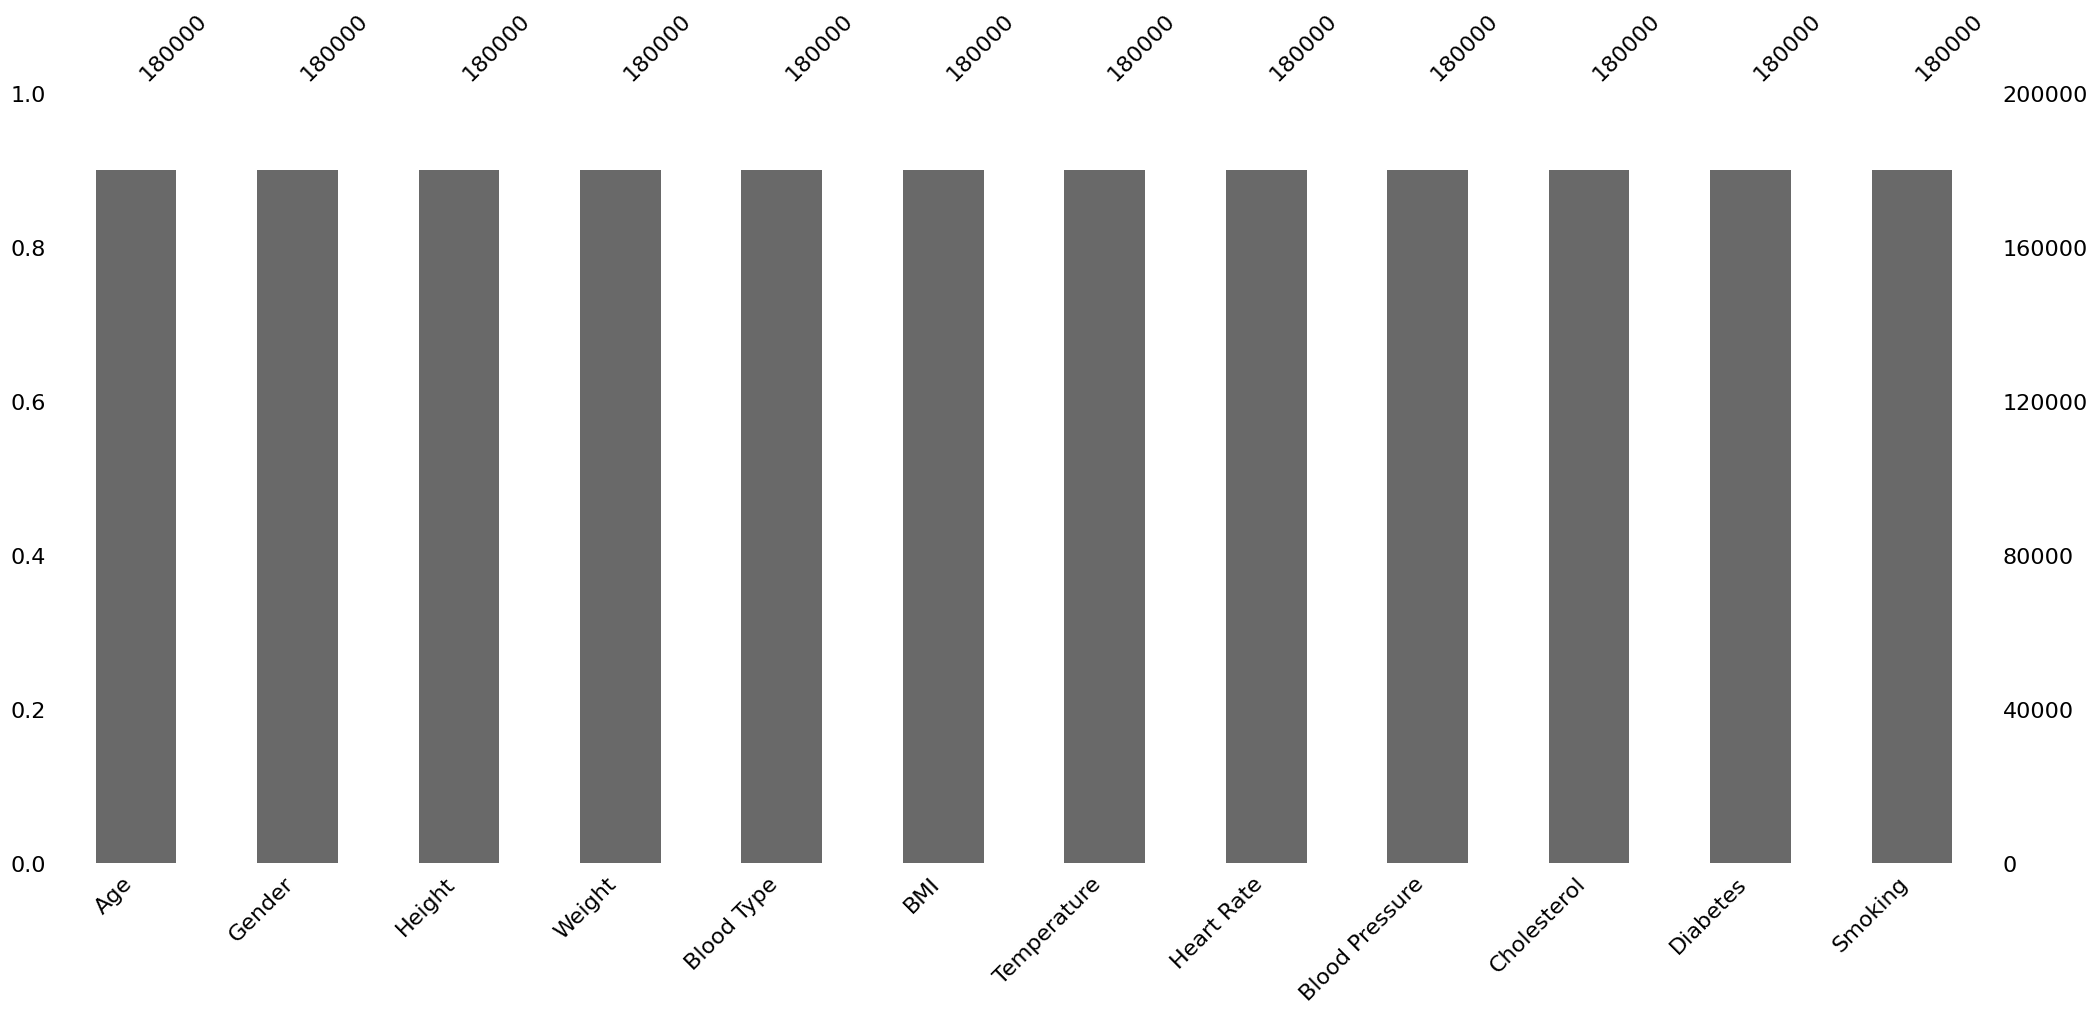

In [251]:
msno.bar(df)

<Axes: >

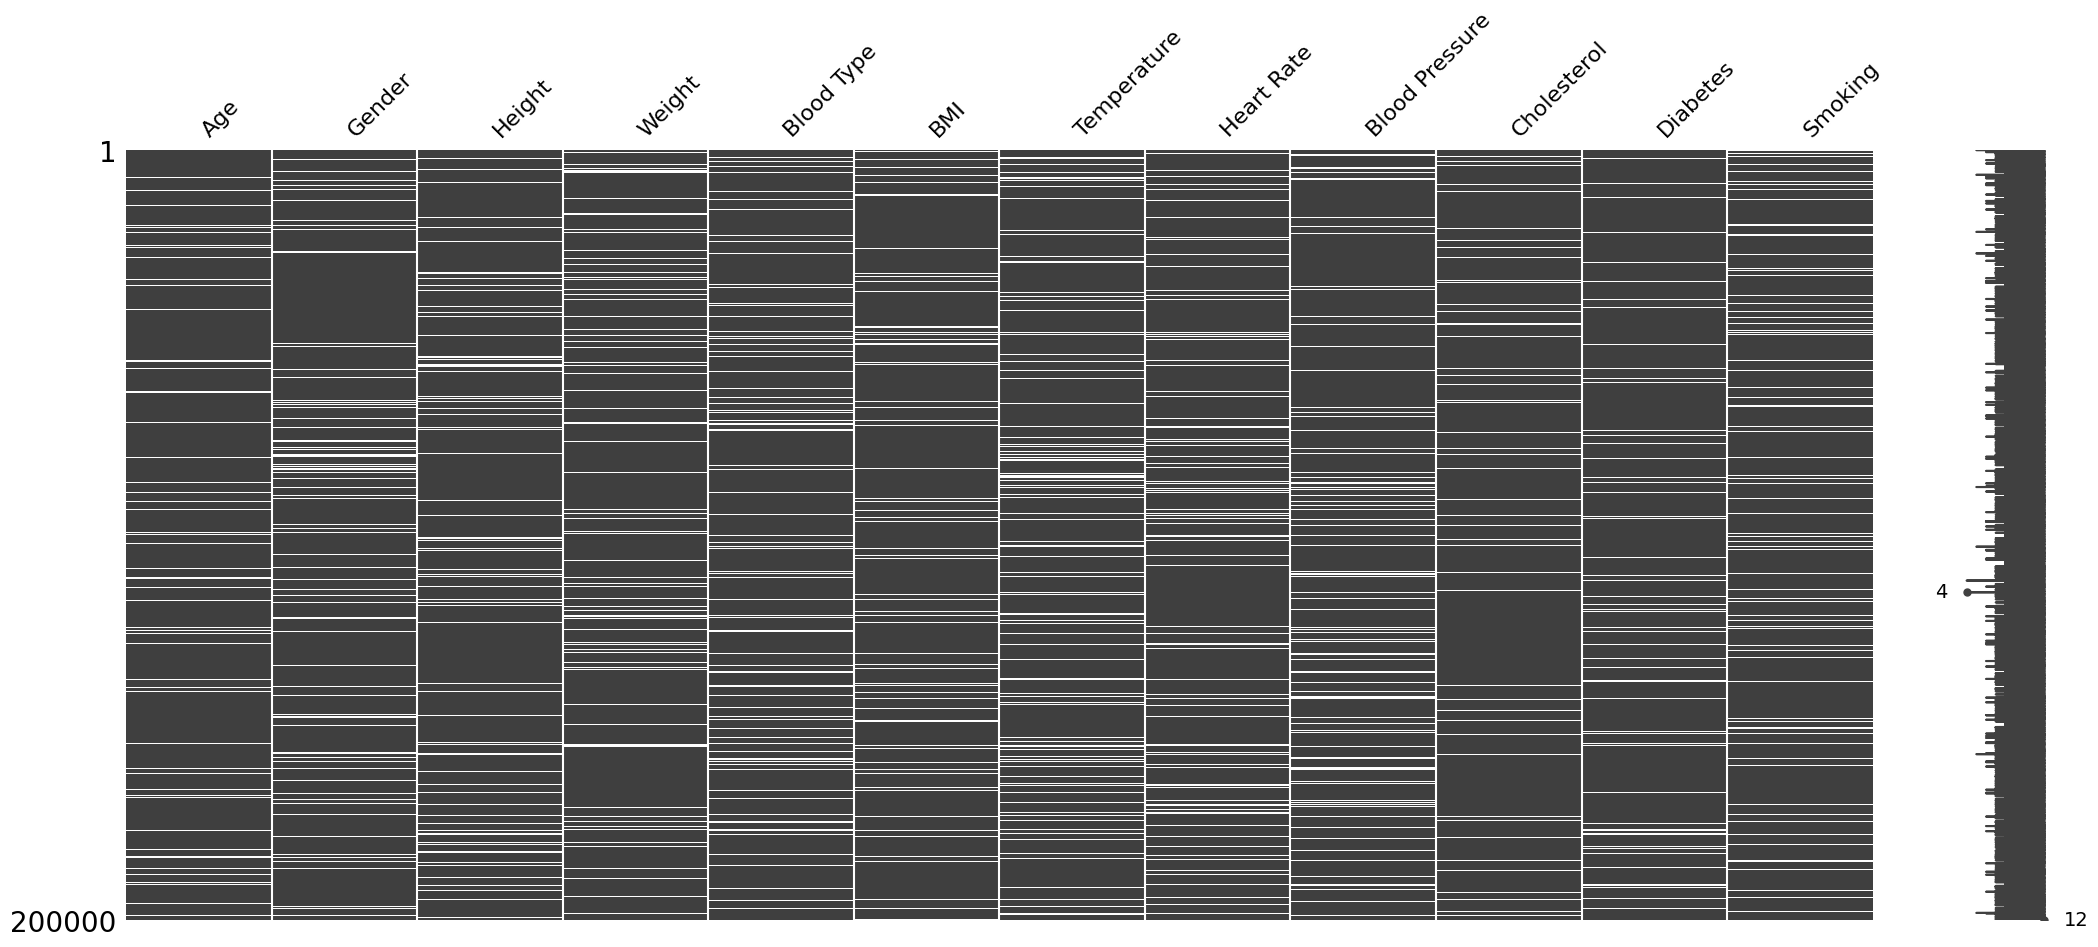

In [252]:
msno.matrix(df)

### Missingness izgleda deka e celosno at random. Sto go pravi po-idealno za imputiranje.


# Categorical Values Encoding

In [253]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [254]:
df_cat=df[["Gender","Blood Type","Diabetes","Smoking"]]

In [255]:
df['Gender'].value_counts()

Gender
Male      90005
Female    89995
Name: count, dtype: int64

In [256]:
df["Blood Type"].value_counts()

Blood Type
B     45537
O     45511
AB    44486
A     44466
Name: count, dtype: int64

In [257]:
df["Diabetes"].value_counts()

Diabetes
No     161986
Yes     18014
Name: count, dtype: int64

In [258]:
df["Smoking"].value_counts()

Smoking
No     143971
Yes     36029
Name: count, dtype: int64

In [ ]:
def encode_boolean(value:str):
    """
    Encodes Yes as 1 or No as 0

    Arguments:
        value(string):

    Returns:
        1 (int): If the input is Yes
        2 (int): If the input is No
    """
    
    if value == 'Yes':
        return 1
    else:
        return 0

In [260]:
df["Diabetes"]=df["Diabetes"].apply(encode_boolean)

In [261]:
df["Diabetes"]=df["Smoking"].apply(encode_boolean)

In [262]:
from sklearn.preprocessing import LabelEncoder

In [263]:
label_encoder = LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])

In [264]:
df["Blood Type"]=label_encoder.fit_transform(df["Blood Type"])

In [265]:
df

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,0,161.777924,72.354947,3,27.645835,NaN,95.0,109.0,203.0,0,NaN
1,NaN,1,152.069157,47.630941,2,NaN,98.714977,93.0,104.0,163.0,0,No
2,32.0,0,182.537664,55.741083,0,16.729017,98.260293,76.0,130.0,216.0,0,No
3,30.0,1,182.112867,63.332207,2,19.096042,98.839605,99.0,112.0,141.0,1,Yes
4,23.0,0,NaN,46.234173,3,NaN,98.480008,95.0,NaN,231.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,24.0,1,176.503260,95.756997,2,30.737254,99.170685,65.0,121.0,130.0,0,No
199996,29.0,0,163.917675,45.225194,4,16.831734,97.865785,62.0,125.0,198.0,1,Yes
199997,34.0,0,NaN,99.648914,4,33.189303,98.768210,60.0,90.0,154.0,0,No
199998,30.0,0,156.446944,50.142824,0,20.486823,98.994212,61.0,106.0,225.0,0,No


## The shape of the data

In [266]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

<Axes: ylabel='Frequency'>

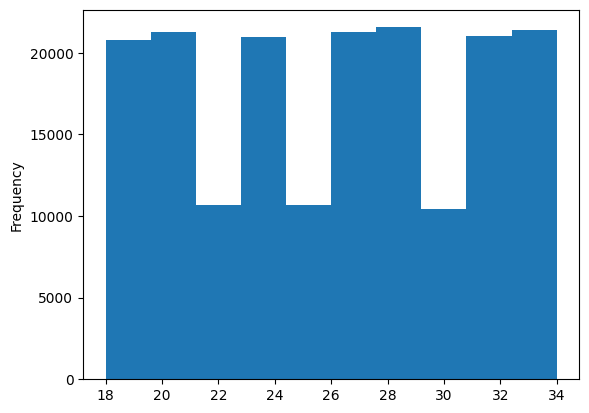

In [267]:
df['Age'].plot.hist()

In [268]:
df["Age"].value_counts()

Age
28.0    10882
27.0    10755
33.0    10703
22.0    10691
25.0    10683
21.0    10677
29.0    10676
34.0    10660
24.0    10600
20.0    10566
31.0    10541
32.0    10510
26.0    10486
30.0    10439
19.0    10413
18.0    10383
23.0    10335
Name: count, dtype: int64

In [269]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI', 'Temperature',
       'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Diabetes', 'Smoking'],
      dtype='object')

<Axes: ylabel='Frequency'>

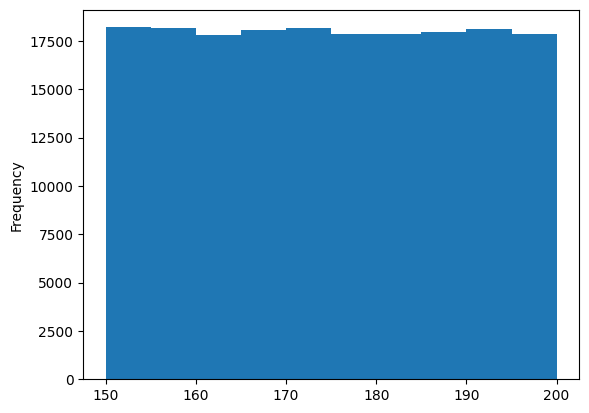

In [270]:
df["Height"].plot.hist()

<Axes: ylabel='Frequency'>

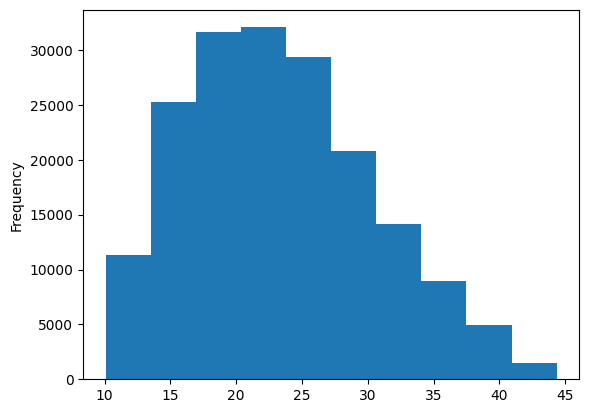

In [271]:
df["BMI"].plot.hist()

<Axes: ylabel='Frequency'>

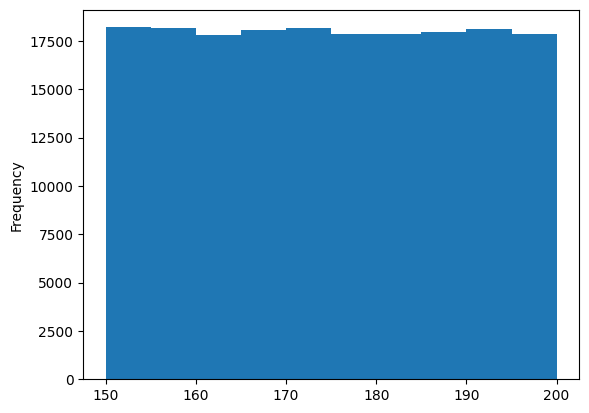

In [272]:
df["Height"].plot.hist()

<Axes: ylabel='Frequency'>

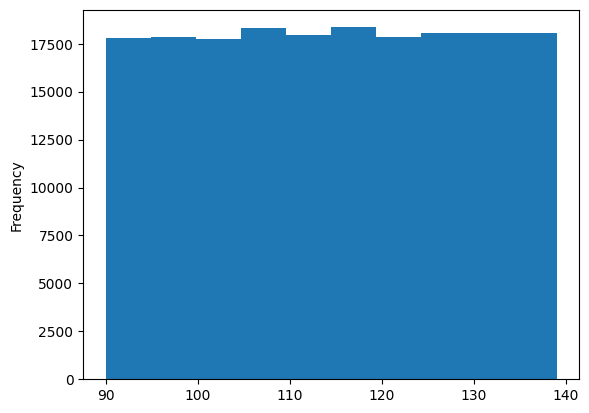

In [273]:
df["Blood Pressure"].plot.hist()

<Axes: ylabel='Frequency'>

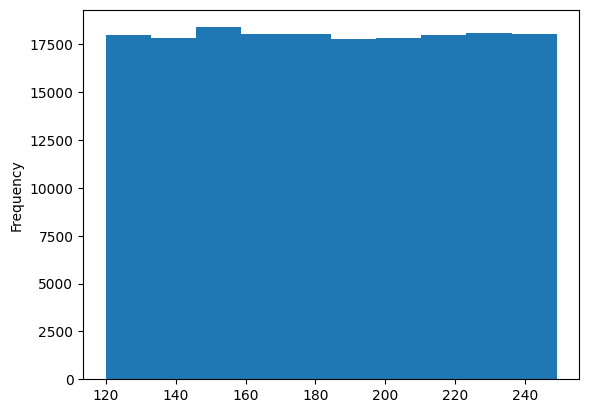

In [274]:
df["Cholesterol"].plot.hist()

# Iterative Imputer (MICE)

In [275]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## testing on known values, to get r2 and mse

In [ ]:
df_NoMissingValues = df.dropna()
df_NoMissingValues = df_NoMissingValues.drop(columns="Smoking")

In [ ]:
mice_imputer_test = IterativeImputer(max_iter = 30)

In [ ]:
def mask_imputation(df: pd.DataFrame, size: float, imputer):
    """
    creates a mask on the dataframe, and imputes the values not in the mask

    Args:
        df (DataFrame): is the dataset to be masked
        size(float): is how big the mask should be
        imputer(An imputer): is used to impute the values that will be masked

    Returns:
        mse (double): returns the mse of the actuall vs imputated values
        r2(double): returns the r2 score of the actuall vs imputated values
    """
    mask = np.random.random(df.shape) < size
    x_missing = df.copy()
    x_values = df.values[mask]

    for i in range (mask.shape[0]):
        for j in range (mask.shape[1]):
            if mask[i,j]:
                x_missing.iloc[i,j]=np.nan


    x_imputed = imputer.fit_transform(x_missing)

    x_predict = x_imputed[mask]

    mse = mean_squared_error(x_values,x_predict)
    r2 = r2_score(x_values,x_predict)

    return mse, r2


In [ ]:
mse, r2 = mask_imputation(df_NoMissingValues,0.2,mice_imputer_test)

/home/petar/Documents/testing_git/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [284]:
print(f"Mean Squared Error: {mse}, r2 score: {r2}")

Mean Squared Error: 178.41467760667032, r2 score: 0.9588217371017989


## USING MICE FOR REAL MISSING VALUES

In [285]:
mice_imputer = IterativeImputer(max_iter=30)

In [ ]:
df_imputation = df.drop(columns="Smoking")

In [287]:
df_mice=mice_imputer.fit_transform(df_imputation)

/home/petar/Documents/testing_git/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
